In [59]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile

In [60]:
# Read the excel file into a pandas DataFrame
df = pd.read_excel('Resources/IBM-Watson-HR-dataset.xlsx', sheet_name='Data')

In [61]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [62]:
#look for columns that could potentially be removed
print("Column headings:")
print(df.columns)

Column headings:
Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [63]:
# our group chose to drop employeenumber, dailyrate, monthlyincome, monthlyrate so that we focus on only one salary variable
df = df.drop([
    "Over18", 
    "StandardHours", 
    "EmployeeCount", 
    "EmployeeNumber", 
    "DailyRate",
    "MonthlyRate", 
    "BusinessTravel", 
    "DailyRate", 
    "Education", 
    "EducationField",
    "EmployeeNumber",
    "JobInvolvement", 
    "JobLevel",
    "MaritalStatus", 
    "NumCompaniesWorked",
    "StockOptionLevel",
    "TotalWorkingYears", 
    "WorkLifeBalance",
    "YearsAtCompany",
    "PerformanceRating",
    "RelationshipSatisfaction",
    "JobRole"

], axis=1)

In [64]:
df.describe()

,Age,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobSatisfaction,MonthlyIncome,PercentSalaryHike,TrainingTimesLastYear,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.721769,65.891156,2.728571,6502.931293,15.209524,2.799320,4.229252,2.187755,4.123129
std,9.135373,8.106864,1.093082,20.329428,1.102846,4707.956783,3.659938,1.289271,3.623137,3.222430,3.568136
min,18.000000,1.000000,1.000000,30.000000,1.000000,1009.000000,11.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,48.000000,2.000000,2911.000000,12.000000,2.000000,2.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,66.000000,3.000000,4919.000000,14.000000,3.000000,3.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,83.750000,4.000000,8379.000000,18.000000,3.000000,7.000000,3.000000,7.000000
max,60.000000,29.000000,4.000000,100.000000,4.000000,19999.000000,25.000000,6.000000,18.000000,15.000000,17.000000


In [65]:
#how many rows and columns do we have?
df.shape

(1470, 15)

In [66]:
#Identify target column and explore its unique values
df["Attrition"].value_counts()
#only two outcomes so this is a binary classification

No     1233
Yes     237
Name: Attrition, dtype: int64

In [67]:
# #convert Yes values to 1 and No values to 0
# df = df[(df["Attrition"] == "Yes") | (df["Attrition"] == "No")]
# mapping_dictionary = {"Attrition": { "Yes": 1, "No": 0 } }
# df = df.replace(mapping_dictionary)
# df.head()

In [68]:
#save work into a CSV file
df.to_csv("Resources/tree_filtered_data.csv",index=False)

In [69]:
#load in the CSV file
filtered_df = pd.read_csv("Resources/tree_filtered_data.csv")
print(filtered_df.shape)
filtered_df.head()

(1470, 15)


,Age,Attrition,Department,DistanceFromHome,EnvironmentSatisfaction,Gender,HourlyRate,JobSatisfaction,MonthlyIncome,OverTime,PercentSalaryHike,TrainingTimesLastYear,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Sales,1,2,Female,94,4,5993,Yes,11,0,4,0,5
1,49,No,Research & Development,8,3,Male,61,2,5130,No,23,3,7,1,7
2,37,Yes,Research & Development,2,4,Male,92,3,2090,Yes,15,3,0,0,0
3,33,No,Research & Development,3,4,Female,56,3,2909,Yes,11,3,7,3,0
4,27,No,Research & Development,2,1,Male,40,2,3468,No,12,3,2,2,2


In [70]:
print("Data types and their frequency\n{}".format(filtered_df.dtypes.value_counts()))
#Object columns contain text which need to be converted to numeric

Data types and their frequency
int64     11
object     4
dtype: int64


In [71]:
#what kind of text are in these 7 columns?
object_columns_df = filtered_df.select_dtypes(include=["object"])
print(object_columns_df.iloc[0])

Attrition        Yes
Department     Sales
Gender        Female
OverTime         Yes
Name: 0, dtype: object


In [72]:
#explore the unique values in these 7 columns
cols = ['Department', 'Gender', 'OverTime']
for name in cols:
    print(name,':')
    print(object_columns_df[name].value_counts(),'\n')

Department :
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64 

Gender :
Male      882
Female    588
Name: Gender, dtype: int64 

OverTime :
No     1054
Yes     416
Name: OverTime, dtype: int64 



In [73]:
#convert ordinal value (businesstravel) to numeric
# mapping_dictionary_2 = {
#     "BusinessTravel": {
#         "Non-Travel": 1,
#         "Travel_Rarely": 2,
#         "Travel_Frequently": 3
#     }
# }

# filtered_df = filtered_df.replace(mapping_dictionary_2)
# filtered_df[["BusinessTravel"]].head()

In [74]:
#encode the nominal columns as dummy variables
nominal_columns = ["Department", "Gender","OverTime"]
dummy_df = pd.get_dummies(filtered_df[nominal_columns])
filtered_df = pd.concat([filtered_df, dummy_df], axis=1)
filtered_df = filtered_df.drop(nominal_columns, axis=1)
filtered_df.head()

,Age,Attrition,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobSatisfaction,MonthlyIncome,PercentSalaryHike,TrainingTimesLastYear,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Human Resources,Department_Research & Development,Department_Sales,Gender_Female,Gender_Male,OverTime_No,OverTime_Yes
0,41,Yes,1,2,94,4,5993,11,0,4,0,5,0,0,1,1,0,0,1
1,49,No,8,3,61,2,5130,23,3,7,1,7,0,1,0,0,1,1,0
2,37,Yes,2,4,92,3,2090,15,3,0,0,0,0,1,0,0,1,0,1
3,33,No,3,4,56,3,2909,11,3,7,3,0,0,1,0,1,0,0,1
4,27,No,2,1,40,2,3468,12,3,2,2,2,0,1,0,0,1,1,0


In [75]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 19 columns):
Age                                  1470 non-null int64
Attrition                            1470 non-null object
DistanceFromHome                     1470 non-null int64
EnvironmentSatisfaction              1470 non-null int64
HourlyRate                           1470 non-null int64
JobSatisfaction                      1470 non-null int64
MonthlyIncome                        1470 non-null int64
PercentSalaryHike                    1470 non-null int64
TrainingTimesLastYear                1470 non-null int64
YearsInCurrentRole                   1470 non-null int64
YearsSinceLastPromotion              1470 non-null int64
YearsWithCurrManager                 1470 non-null int64
Department_Human Resources           1470 non-null uint8
Department_Research & Development    1470 non-null uint8
Department_Sales                     1470 non-null uint8
Gender_Female                        

In [76]:
filtered_df.to_csv("Resources/tree_cleaned_data.csv", index=False)

In [77]:
# https://www.dataquest.io/blog/machine-learning-preparing-data/

In [78]:
df = pd.read_csv("Resources/tree_cleaned_data.csv")
df.head()

,Age,Attrition,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobSatisfaction,MonthlyIncome,PercentSalaryHike,TrainingTimesLastYear,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Human Resources,Department_Research & Development,Department_Sales,Gender_Female,Gender_Male,OverTime_No,OverTime_Yes
0,41,Yes,1,2,94,4,5993,11,0,4,0,5,0,0,1,1,0,0,1
1,49,No,8,3,61,2,5130,23,3,7,1,7,0,1,0,0,1,1,0
2,37,Yes,2,4,92,3,2090,15,3,0,0,0,0,1,0,0,1,0,1
3,33,No,3,4,56,3,2909,11,3,7,3,0,0,1,0,1,0,0,1
4,27,No,2,1,40,2,3468,12,3,2,2,2,0,1,0,0,1,1,0


In [79]:
# Create a random forest classifier
from sklearn.ensemble import RandomForestClassifier

target = df["Attrition"]
data = df.drop([
    "Attrition", 
    "OverTime_No",  
    "Gender_Male",
    "Department_Sales"
],
    axis=1)

feature_names = data.columns
data.head()

#split data into training and testing sets
from sklearn import tree
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data, target, random_state=1)

In [80]:
# clf = tree.DecisionTreeClassifier()
# clf = clf.fit(X_train, y_train)
# clf.score(X_test, y_test)

# #Is this a decision tree score?
# #This tree will predict the correct outcome 78.8% of the time

In [81]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

#random forest gives an accuracy of 82.3%

0.8233695652173914

In [82]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=3, n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

#random forest gives an accuracy of 83.15%

0.8179347826086957

In [56]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.19234044478784476, 'MonthlyIncome'),
 (0.1695850531357337, 'OverTime_Yes'),
 (0.1446349590977361, 'Age'),
 (0.11815120510000575, 'YearsWithCurrManager'),
 (0.09482318693014587, 'YearsInCurrentRole'),
 (0.05790551318551904, 'EnvironmentSatisfaction'),
 (0.05557356789188059, 'DistanceFromHome'),
 (0.03376964746582752, 'TrainingTimesLastYear'),
 (0.033187088171960526, 'Department_Research & Development'),
 (0.029904382819975085, 'JobSatisfaction'),
 (0.028685518078700706, 'HourlyRate'),
 (0.018076047204942013, 'PercentSalaryHike'),
 (0.01546371510458747, 'YearsSinceLastPromotion'),
 (0.006796668659251912, 'Gender_Female'),
 (0.0011030023658891496, 'Department_Human Resources')]

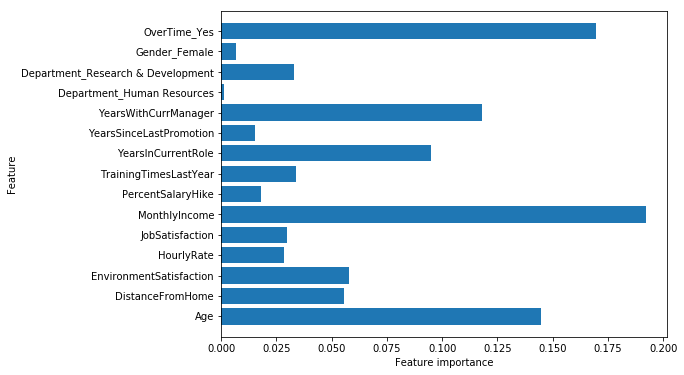

In [58]:
def plot_feature_importances_attrition(model):
    plt.figure(figsize=(8,6))
    n_features = 15
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plot_feature_importances_attrition(rf)
plt.savefig('feature_importance')

In [27]:
#one-sample t-test (measuring age v. attrition)
#null hypothesis: there is no difference in age btwn employees who left and those who stayed

#Compare the means of employee attrition age against the employee population who stayed
emp_population = df['Age'].mean()
emp_turnover_age = df[df['Attrition']=="Yes"]['Age'].mean()

print( 'The mean age for the employee population is: ' + str(emp_population))
print( 'The mean age for employees that had a turnover is: ' + str(emp_turnover_age) )


The mean age for the employee population is: 36.923809523809524
The mean age for employees that had a turnover is: 33.607594936708864


In [28]:
#convert Yes values to 1 and No values to 0
df = df[(df["Attrition"] == "Yes") | (df["Attrition"] == "No")]
mapping_dictionary = {"Attrition": { "Yes": 1, "No": 0 } }
df = df.replace(mapping_dictionary)
df.head()

,Age,Attrition,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobSatisfaction,MonthlyIncome,PercentSalaryHike,TrainingTimesLastYear,YearsInCurrentRole,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,OverTime_No,OverTime_Yes
0,41,1,1,2,94,4,5993,11,0,4,...,0,0,0,0,0,0,1,0,0,1
1,49,0,8,3,61,2,5130,23,3,7,...,0,0,0,0,0,1,0,0,1,0
2,37,1,2,4,92,3,2090,15,3,0,...,0,1,0,0,0,0,0,0,0,1
3,33,0,3,4,56,3,2909,11,3,7,...,0,0,0,0,0,1,0,0,0,1
4,27,0,2,1,40,2,3468,12,3,2,...,0,1,0,0,0,0,0,0,1,0


In [29]:
import scipy.stats as stats
stats.ttest_1samp(a=  df[df['Attrition']==1]['Age'], # Sample of Employee age who had a Turnover
              popmean = emp_population)  # Employee Who Had No Turnover age mean

Ttest_1sampResult(statistic=-5.268926728565501, pvalue=3.091919341321694e-07)

In [30]:
#above test result shows the test statistic "t" is equal to -5.26. 
#this tell us how much the sample mean deviates from the null hypothesis
#if the t-statistic (-5.26) is outside the quantiles then we reject null hyp.

degree_freedom = len(df[df['Attrition']==1])

LQ = stats.t.ppf(0.025,degree_freedom)  # Left Quartile

RQ = stats.t.ppf(0.975,degree_freedom)  # Right Quartile

print ('The t-distribution left quartile range is: ' + str(LQ))
print ('The t-distribution right quartile range is: ' + str(RQ))

The t-distribution left quartile range is: -1.9700240104025675
The t-distribution right quartile range is: 1.970024010402567


In [31]:
#reject the null hypothesis because:
#1) t-test score (-5.26) is outside the quantiles
#2) p-value (3.091919341321694e-07) is lower than confidence level of 5%
#Thus, based on this one sample, there is significant difference btwn the mean age of employees who left versus those who stay

In [32]:
#one-sample t-test (measuring hourly rate v. attrition)
#null hypothesis: there is no difference in hourly rate btwn employees who left and those who stayed

#Compare the means of employee attrition hourly rate against the employee population who stayed
emp_population_pay = df['HourlyRate'].mean()
emp_turnover_pay = df[df['Attrition']==1]['HourlyRate'].mean()

print( 'The mean hourly rate for the employee population is: ' + str(emp_population_pay))
print( 'The mean hourly rate for employees that had a turnover is: ' + str(emp_turnover_pay) )

The mean hourly rate for the employee population is: 65.89115646258503
The mean hourly rate for employees that had a turnover is: 65.57383966244726


In [33]:
import scipy.stats as stats
stats.ttest_1samp(a=  df[df['Attrition']==1]['HourlyRate'], # Sample of Employee hourly rate who had a Turnover
              popmean = emp_population_pay)  # Employee Who Had No Turnover hourly rate mean

Ttest_1sampResult(statistic=-0.24303683324362974, pvalue=0.8081879675889055)

In [34]:
#hourly rate is not significantly different (p-value is greater than 0.05)

In [35]:
#one-sample t-test (measuring overtime_yes v. attrition)
#null hypothesis: there is no difference in overtime btwn employees who left and those who stayed

#Compare the means of employee attrition overtime against the employee population who stayed
emp_population_OT = df['OverTime_Yes'].mean()
emp_turnover_OT = df[df['Attrition']==1]['OverTime_Yes'].mean()

print( 'The mean overtime_yes for the employee population is: ' + str(emp_population_OT))
print( 'The mean overtime_yes for employees that had a turnover is: ' + str(emp_turnover_OT) )

import scipy.stats as stats
stats.ttest_1samp(a=  df[df['Attrition']==1]['OverTime_Yes'], # Sample of Employee overtime who had a Turnover
              popmean = emp_population_OT)  # Employee Who Had No Turnover overtime mean

The mean overtime_yes for the employee population is: 0.2829931972789116
The mean overtime_yes for employees that had a turnover is: 0.5358649789029536


Ttest_1sampResult(statistic=7.789444958303489, pvalue=2.124287654870015e-13)

In [36]:
#overtime_yes is significantly different

In [37]:
#one-sample t-test (measuring environment satisfaction v. attrition)
#null hypothesis: there is no difference in environment satisfaction btwn employees who left and those who stayed

#Compare the means of employee attrition hourly rate against the employee population who stayed
emp_population_ES = df['EnvironmentSatisfaction'].mean()
emp_turnover_ES = df[df['Attrition']==1]['EnvironmentSatisfaction'].mean()

print( 'The mean overtime_yes for the employee population is: ' + str(emp_population_ES))
print( 'The mean overtime_yes for employees that had a turnover is: ' + str(emp_turnover_ES) )

import scipy.stats as stats
stats.ttest_1samp(a=  df[df['Attrition']==1]['EnvironmentSatisfaction'],
              popmean = emp_population_ES)  

The mean overtime_yes for the employee population is: 2.721768707482993
The mean overtime_yes for employees that had a turnover is: 2.4641350210970465


Ttest_1sampResult(statistic=-3.3905366280447264, pvalue=0.0008175913692967167)

In [38]:
#environment satisfaction is statistically differnet.